
# HW6


### Q1: Theoretical Explanation of Simple Linear Regression Model

A Simple Linear Regression (SLR) model describes a linear relationship between a predictor variable \( x \) and an outcome variable \( Y \). This model is often represented by the equation:

\[
Y = \beta_0 + \beta_1 \cdot x + \epsilon
\]

where:
- \( \beta_0 \): the **intercept** or constant term, which is the expected value of \( Y \) when \( x = 0 \),
- \( \beta_1 \): the **slope**, representing the change in \( Y \) for each one-unit increase in \( x \),
- \( \epsilon \): an **error term** that accounts for random variation in \( Y \) not explained by \( x \).

The error term \( \epsilon \) is typically assumed to follow a normal distribution with mean 0 and variance \( \sigma^2 \). This implies that for a fixed \( x \), \( Y \) values are normally distributed around the line defined by \( Y = \beta_0 + \beta_1 \cdot x \).

### Python Code Demonstration

The following Python code demonstrates this process by generating values for \( x \), calculating \( Y \) based on chosen values of \( \beta_0 \), \( \beta_1 \), and \( \sigma \), and visualizing the results.


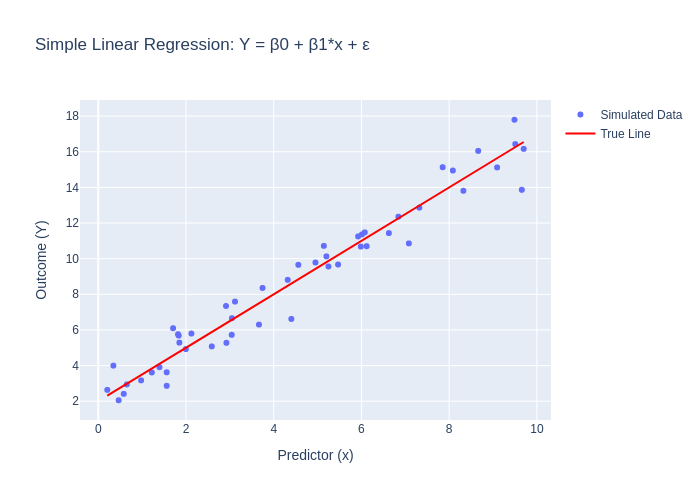

In [1]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters for the SLR model
n = 50           # Number of data points
beta0 = 2.0      # Intercept
beta1 = 1.5      # Slope
sigma = 1.0      # Standard deviation of the error term

# Generate predictor values x
np.random.seed(42)  # For reproducibility
x = stats.uniform.rvs(0, 10, size=n)  # Sample x from a uniform distribution

# Generate error terms from a normal distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Compute Y using the SLR model
Y = beta0 + beta1 * x + epsilon

# Plot the true line and data points
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Line', line=dict(color='red')))
fig.update_layout(title="Simple Linear Regression: Y = β0 + β1*x + ε",
                  xaxis_title="Predictor (x)",
                  yaxis_title="Outcome (Y)")
fig.show(renderer="png")


### Q2: Demonstration of Fitted Simple Linear Regression Model

To demonstrate the process of creating and visualizing a fitted Simple Linear Regression model, we'll use the dataset simulated from the theoretical model in Question 1 and perform the following steps:

1. **Combine** the generated `x` and `Y` values into a pandas DataFrame named `df` with columns labeled "x" and "Y".
2. **Fit** a linear regression model to the data using `statsmodels`.
3. **Visualize** the data points and fitted line using `plotly.express`.

### Code and Explanations


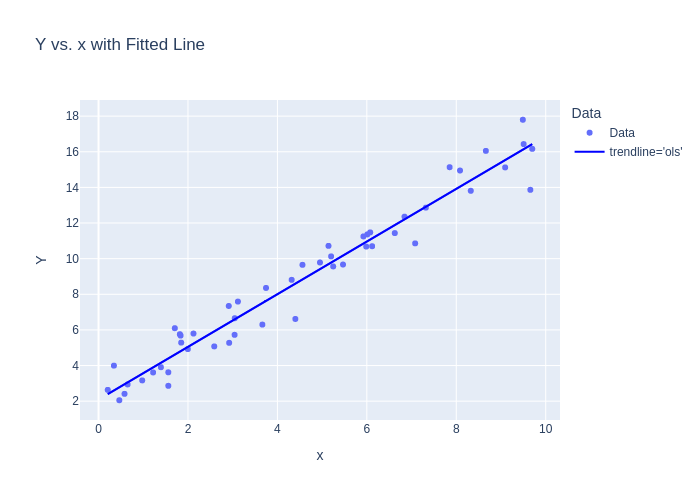

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf  # Used for creating and fitting statistical models
import plotly.express as px
# Step 1: Simulate data using the Simple Linear Regression model
n = 50           # Number of data points
beta0 = 2.0      # Intercept
beta1 = 1.5      # Slope
sigma = 1.0      # Standard deviation of the error term

# Generate predictor values and error terms
np.random.seed(42)
x = stats.uniform.rvs(0, 10, size=n)  # Sample x from a uniform distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Compute Y using the SLR model
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specify the model (Y as a function of x)
fitted_model = model_data_specification.fit()         # Fit the model to obtain estimated coefficients
# Output summaries from the fitted model
fitted_model.summary()           # Full statistical summary of the model
fitted_model.summary().tables[1] # Table of coefficient estimates and standard errors
fitted_model.params              # Estimated coefficients for intercept and slope
fitted_model.params.values       # Values of estimated coefficients
fitted_model.rsquared            # R-squared value indicating model fit quality

# Step 3: Visualize data with the fitted line
df['Data'] = 'Data'  # Add label to differentiate in the plot legend

fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Fitted Line')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")
fig.show(renderer="png")



### Q3: Adding the Theoretical Line from Question 1 and Explaining the Differences

In this question, we’ll overlay the **theoretical line** from the initial Simple Linear Regression model in Question 1 onto the figure we created in Question 2. This comparison will help highlight the difference between the theoretical relationship specified by the model (without random variation) and the **fitted line** obtained from actual simulated data with randomness.

#### Explanation of the Two Lines

1. **Theoretical Line**: This line represents the true relationship defined by our chosen parameters \( \beta_0 \) and \( \beta_1 \). It assumes no random variation, serving as an "ideal" or expected relationship between \( x \) and \( Y \).
  
2. **Fitted Line (OLS)**: This line results from fitting an ordinary least squares (OLS) regression to the simulated data. It reflects the influence of random variation or sampling error on the relationship between \( x \) and \( Y \). Each new dataset would produce a slightly different fitted line due to these random variations.

#### Purpose of Comparing the Lines
By overlaying these two lines, we can observe how closely the fitted line approximates the theoretical line under random sampling. This comparison shows that although the fitted line varies with different datasets, it approximates the theoretical line on average. This demonstrates the concept of **sampling variability**, where individual samples produce slightly different regression results but generally capture the true relationship.


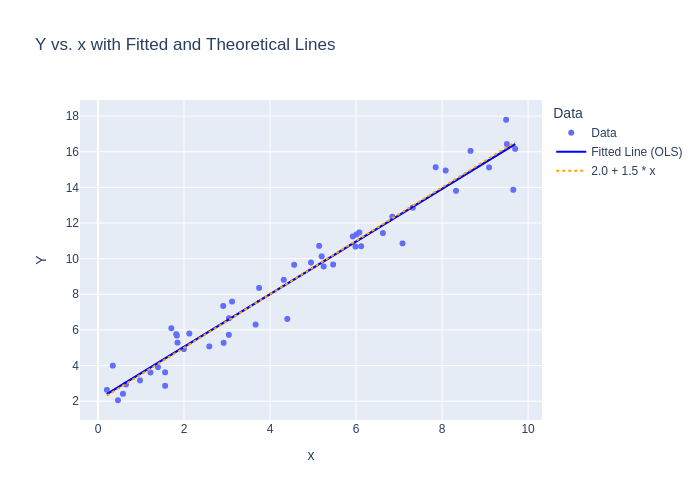

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate data using the Simple Linear Regression model
n = 50
beta0 = 2.0
beta1 = 1.5
sigma = 1.0

np.random.seed(42)
x = stats.uniform.rvs(0, 10, size=n)
epsilon = stats.norm.rvs(0, sigma, size=n)
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add both the fitted line and theoretical line to the visualization
df['Data'] = 'Data'  # Add label to differentiate in the legend

# Create a scatter plot with trendline and add the theoretical line
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Fitted and Theoretical Lines')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Line (OLS)")

# Calculate theoretical line across range of x
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f'{beta0} + {beta1} * x', line=dict(dash='dot', color='orange'))

fig.show(renderer="png")


### Q4: Explanation of `fitted_model.fittedvalues` in Relation to `fitted_model.params`

The `fitted_model.fittedvalues` in a fitted Simple Linear Regression model represent the predicted values of \( Y \) based on the estimated coefficients obtained from the model fitting process. These predictions use the values of the intercept and slope found in `fitted_model.params`, which contains the estimated values of \( \beta_0 \) (intercept) and \( \beta_1 \) (slope).

#### Derivation of `fitted_model.fittedvalues` Using Model Parameters

1. **Model Parameters**: After fitting the model with OLS, `fitted_model.params` provides estimates for \( \beta_0 \) and \( \beta_1 \).
   - `fitted_model.params[0]` gives the estimated intercept (\( \hat{\beta}_0 \)).
   - `fitted_model.params[1]` gives the estimated slope (\( \hat{\beta}_1 \)).

2. **Prediction Equation**: Each value in `fitted_model.fittedvalues` is calculated by applying the estimated linear equation:
   \[
   \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_i
   \]
   where \( x_i \) is each individual value of the predictor \( x \) from the dataset, and \( \hat{Y}_i \) is the predicted \( Y \)-value for that \( x_i \).

3. **Distinction from Theoretical Model**: While the theoretical model uses the true values of \( \beta_0 \) and \( \beta_1 \), `fitted_model.fittedvalues` relies on the estimated values obtained from the data. This difference highlights how predictions vary due to sampling variation.


In [4]:
# Extract estimated parameters from the fitted model
beta0_estimate = fitted_model.params.iloc[0]  # Estimated intercept
beta1_estimate = fitted_model.params.iloc[1]  # Estimated slope


# Manually calculate fitted values using estimated parameters
manual_fitted_values = beta0_estimate + beta1_estimate * df['x']

# Verify that manual calculations match fitted_model.fittedvalues
print("Manual Fitted Values:")
print(manual_fitted_values.head())
print("\nAutomatically Calculated Fitted Values:")
print(fitted_model.fittedvalues.head())


Manual Fitted Values:
0     7.631106
1    16.144982
2    12.913046
3    10.942806
4     4.402109
Name: x, dtype: float64

Automatically Calculated Fitted Values:
0     7.631106
1    16.144982
2    12.913046
3    10.942806
4     4.402109
dtype: float64


### Q5: Explanation of the Fitted Line Chosen by the "Ordinary Least Squares" (OLS) Method

In Simple Linear Regression, the "ordinary least squares" (OLS) method is used to find the line that best represents the relationship between the predictor variable \( x \) and the outcome variable \( Y \) based on observed data. The OLS method selects the line that **minimizes the sum of the squared residuals**.

#### Why "Squares" Are Used
1. **Residuals**: Residuals are the differences between the observed values of \( Y \) and the values predicted by the regression line. They reflect the unexplained variability after fitting the model.
   
2. **Squared Residuals**: Squaring each residual serves two purposes:
   - It removes negative signs, treating all deviations from the fitted line as positive values.
   - It penalizes larger residuals more heavily, ensuring that the line selected by OLS minimizes large errors effectively.

By minimizing the sum of squared residuals, OLS chooses the line that is as close as possible to all observed points on average, balancing out the variability in the data. This differs from the **error terms** in the theoretical model, which represent inherent variability, whereas residuals specifically reflect how well the model fits the data points.


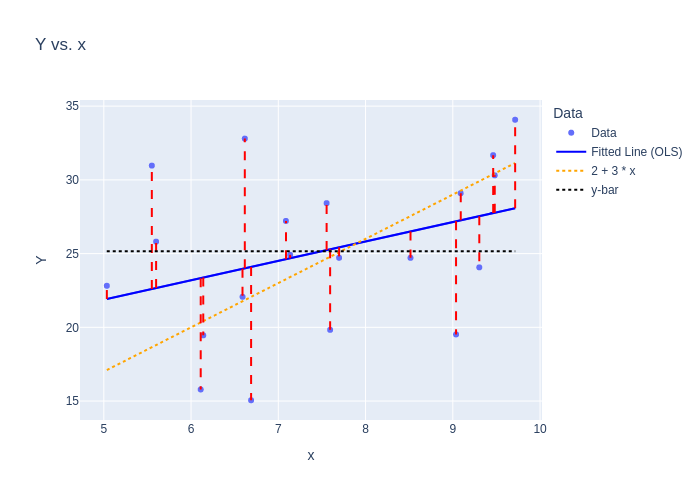

In [5]:
# Visualization code as provided in the question
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data'  # Label for legend

fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add fitted line and theoretical line
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Line (OLS)")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f'{beta0} + {beta1} * x', line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()] * 2, mode='lines', line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")


### Q6: Interpretation of R-squared and Correlation in Simple Linear Regression

The **R-squared** value, represented by `fitted_model.rsquared`, quantifies the proportion of variance in the outcome variable \( Y \) that is explained by the fitted model. In other words, it shows how well the model predicts the observed data. Let's break down each of the provided expressions to see how they relate to this concept.

#### Expression 1: `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()`

1. **Total Variation in \( Y \)**: The denominator, `((Y - Y.mean())**2).sum()`, calculates the **total variation** in \( Y \) by summing the squared deviations of \( Y \) from its mean. This represents the total amount of variability in the outcome \( Y \).
   
2. **Unexplained Variation**: The numerator, `((Y - fitted_model.fittedvalues)**2).sum()`, calculates the **unexplained variation**, which is the sum of squared residuals. These residuals show how much of \( Y \) is not captured by the model.

3. **Proportion Explained**: By taking \( 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}} \), we find the **proportion of variation explained by the model**. This is the R-squared value, indicating how much of the variability in \( Y \) the model explains.

#### Expression 2: `fitted_model.rsquared`

This is simply the R-squared value as calculated by the `statsmodels` library, which directly represents the proportion of variation in \( Y \) that is explained by the model. It is equivalent to Expression 1 and provides a measure of the model's predictive accuracy, with values closer to 1 indicating a better fit.

#### Expression 3: `np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`

The correlation coefficient `np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]` represents the linear relationship between \( Y \) and the model’s fitted values. Squaring this value gives R-squared, as it captures the proportion of the variance in \( Y \) explained by the linear relationship with the fitted values.

#### Expression 4: `np.corrcoef(Y, x)[0, 1]**2`

This expression captures the squared correlation between the predictor variable \( x \) and the outcome \( Y \). In simple linear regression, this value also matches the R-squared value, since there’s only one predictor variable. It represents the proportion of variance in \( Y \) explained by \( x \) alone.

### Summary

In summary:
- **R-squared** (`fitted_model.rsquared`) measures the model's accuracy in explaining the variation in \( Y \) and is derived by comparing the total variation in \( Y \) with the unexplained variation.
- **Correlation-based R-squared** (`np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`) reaffirms the strength of the linear relationship.
- **Predictor-Outcome Correlation** (`np.corrcoef(Y, x)[0, 1]**2`) in single predictor models will match R-squared, further emphasizing that all explained variance in \( Y \) is due to \( x \).


### Q7: Assumptions of the Simple Linear Regression Model and Compatibility with Example Data

The Simple Linear Regression (SLR) model relies on several key assumptions about the data. Here are two assumptions that do not appear compatible with the provided dataset based on the scatter plot and histogram of residuals:

1. **Linearity**: The SLR model assumes a linear relationship between the predictor variable (Amount of Fertilizer) and the outcome variable (Crop Yield). However, the scatter plot shows a non-linear relationship. Initially, there appears to be little to no increase in crop yield, followed by a more rapid increase as fertilizer use increases. This pattern suggests a non-linear association that a simple linear model would not adequately capture.

2. **Homoscedasticity**: Another assumption is that the residuals (the differences between observed values and model predictions) should have constant variance across all levels of the predictor variable. In this case, the histogram of residuals and the scatter plot both suggest heteroscedasticity, meaning the residual variance increases as fertilizer use increases. This results in larger deviations from the fitted line at higher fertilizer amounts, indicating the model's inability to account for the pattern fully.

#### Summary
The non-linear pattern and unequal variance of residuals indicate that the data do not satisfy the assumptions of linearity and homoscedasticity, which are fundamental to the Simple Linear Regression model.


### Q8: Specifying the Null Hypothesis and Interpreting Evidence in the Old Faithful Geyser Dataset

#### Null Hypothesis
In the context of Simple Linear Regression, we can specify a null hypothesis (\( H_0 \)) of **no linear association** between the waiting time for an eruption and the duration of the eruption. This is expressed in terms of the slope parameter (\( \beta_1 \)) in the linear model:
\[
H_0: \beta_1 = 0
\]
where \( \beta_1 \) represents the change in eruption duration per unit increase in waiting time. The null hypothesis asserts that \( \beta_1 = 0 \), implying that, on average, changes in waiting time do not affect eruption duration.

#### Evidence and Interpretation
Using the provided code, we fit a linear regression model to the Old Faithful dataset and examine the resulting p-value for \( \beta_1 \) to assess the evidence against the null hypothesis.

#### Python Code for Fitting the Model and Summarizing Results


In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the Simple Linear Regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        23:06:00   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

### Q9: Testing the Relationship Between Duration and Wait Time for Short Wait Times in Old Faithful Data

#### Question Context
In the full Old Faithful Geyser dataset, we observed that for wait times over approximately 63 minutes, there was a notable increase in eruption duration. Here, we focus on **short wait times** below specific limits (62, 64, and 66 minutes) to determine if a similar linear relationship exists between duration and wait time within this restricted context.

#### Null Hypothesis
The null hypothesis (\( H_0 \)) remains the same as in previous questions, indicating no linear association between wait time and duration:
\[
H_0: \beta_1 = 0
\]
where \( \beta_1 \) represents the slope of the relationship between wait time and duration within the restricted dataset.

#### Python Code to Perform the Analysis
The code below fits the Simple Linear Regression model for each specified `short_wait_limit` value and generates a scatter plot with a fitted trendline for each subset of data.



Summary for short_wait_limit = 62
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


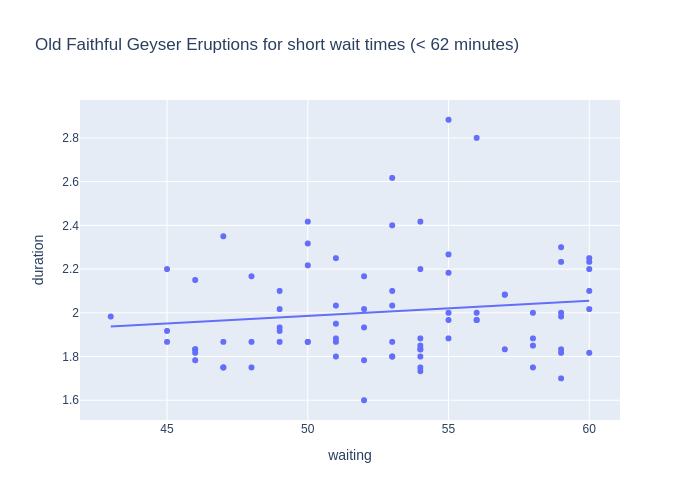


Summary for short_wait_limit = 64
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


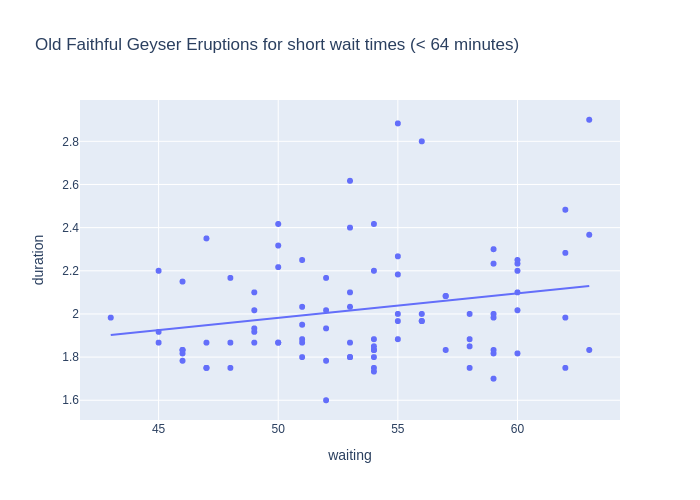


Summary for short_wait_limit = 66
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


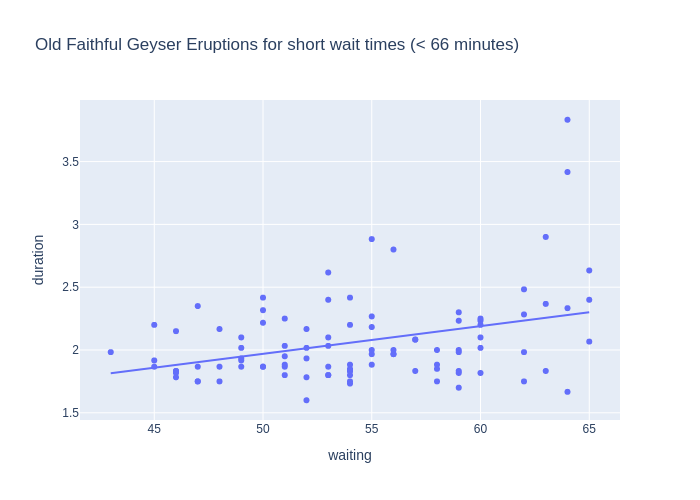

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Test for short wait time limits of 62, 64, and 66 minutes
for short_wait_limit in [62, 64, 66]:
    short_wait = old_faithful.waiting < short_wait_limit  # Filter for short wait times
    
    # Fit a linear regression model for the restricted data
    fitted_model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    
    # Display the model's summary table for the slope parameter
    print(f"\nSummary for short_wait_limit = {short_wait_limit}")
    print(fitted_model.summary().tables[1])  # Display summary of model's slope and p-value
    
    # Plot scatter plot with trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (< {short_wait_limit} minutes)", 
                     trendline='ols')
    fig.show(renderer="png")


### Q10: Bootstrapped and Simulated Sampling Distribution of the Fitted Slope Coefficient for Long Wait Times

#### Question Breakdown
1. **Bootstrapped Sampling Distribution**: We will create a bootstrapped sampling distribution of the slope coefficients from Simple Linear Regression models fitted on samples of the "long wait times" data (where waiting > 71).
2. **Simulated Sampling Distribution (Null Hypothesis)**: We will simulate samples under the assumption of no linear association (i.e., slope \( \beta_1 = 0 \)) and visualize the sampling distribution of slope coefficients.
3. **Comparing Confidence Interval and p-value**: Finally, we’ll check if the observed slope from the original data falls within the 95% bootstrapped confidence interval, and if the simulated p-value matches the p-value from `smf.ols(...)`.

#### Python Code for Analysis


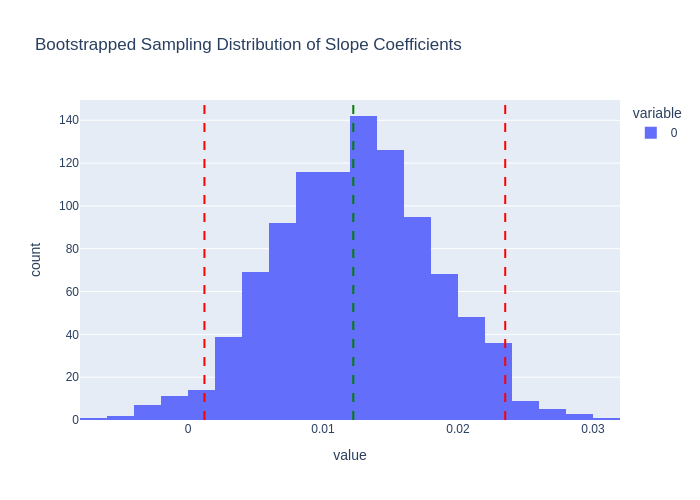

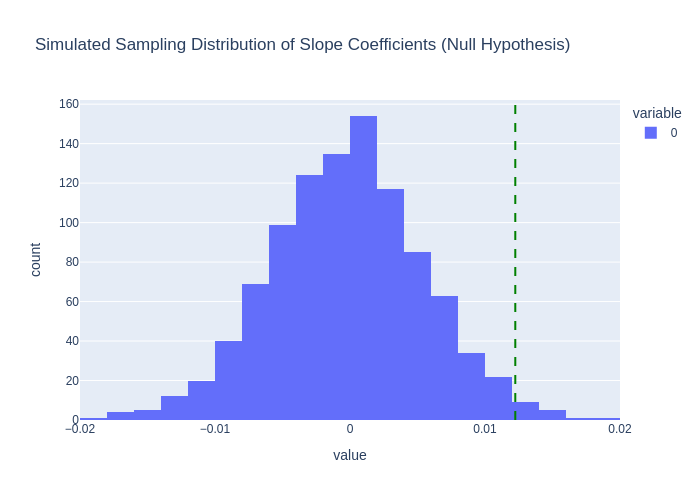

95% Bootstrapped Confidence Interval for Slope: [0.00121669 0.02349754]
Simulated p-value for null hypothesis: 0.033


In [8]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px
import seaborn as sns

# Load the Old Faithful dataset and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Observed slope from the original data
observed_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope = observed_model.params.iloc[1]

# Initialize lists to collect slope coefficients
bootstrapped_slope_coefficients = []
simulated_slope_coefficients = []

# Bootstrapping: Fit model on bootstrap samples and collect slope coefficients
for _ in range(1000):  # 1000 bootstrap samples
    sample_data = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    bootstrapped_slope_coefficients.append(model.params.iloc[1])

# Simulation under null hypothesis (no linear association)
for _ in range(1000):  # 1000 simulated samples
    simulated_data = long_wait_data.copy()
    simulated_data['duration'] = 1.65 + 0 * simulated_data.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait_data.shape[0])
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slope_coefficients.append(model.params.iloc[1])

# Convert lists to numpy arrays for easier manipulation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Bootstrapped 95% confidence interval for the slope coefficient
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Simulated p-value under the null hypothesis
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Plot the bootstrapped and simulated sampling distributions
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.add_vline(x=bootstrapped_ci[0], line=dict(color='red', dash='dash'), name="Lower 95% CI")
fig.add_vline(x=bootstrapped_ci[1], line=dict(color='red', dash='dash'), name="Upper 95% CI")
fig.add_vline(x=observed_slope, line=dict(color='green', dash='dash'), name="Observed Slope")
fig.show(renderer="png")

fig = px.histogram(simulated_slope_coefficients, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)")
fig.add_vline(x=observed_slope, line=dict(color='green', dash='dash'), name="Observed Slope")
fig.show(renderer="png")

# Output results
print(f"95% Bootstrapped Confidence Interval for Slope: {bootstrapped_ci}")
print(f"Simulated p-value for null hypothesis: {simulated_p_value}")


### Q11: Analysis of Duration Differences Between Short and Long Wait Times Using an Indicator Variable

#### Model Overview
In this question, we’re examining a **Simple Linear Regression model with an indicator variable** based on a new categorization of "short" and "long" wait times. The goal is to compare this model specification to the previously analyzed models where duration was regressed on waiting time as a continuous variable.

1. **New Indicator Variable Model**: This model specification uses an indicator variable (or categorical variable) `kind`, where wait times below 68 minutes are labeled "short" and those 68 minutes or longer are labeled "long." The regression then predicts eruption `duration` based on `kind`, contrasting average durations between short and long wait times.

2. **Comparison with Previous Models**:
   - **Simple Linear Regression (Overall)**: `smf.ols('duration ~ waiting', data=old_faithful)` estimates a single slope for the whole dataset, assuming a continuous, linear relationship between waiting time and eruption duration.
   - **Short Wait Times Only**: `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` and **Long Wait Times Only**: `smf.ols('duration ~ waiting', data=old_faithful[long_wait])` examine the linear relationship within each subset individually.
   - **Indicator Variable Model**: Instead of using a continuous predictor, `smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)` compares eruption durations between "short" and "long" wait times as distinct groups, allowing for differences in duration averages rather than slopes.

#### Statistical Analysis and Null Hypothesis Testing

The null hypothesis here is that **there is no difference in average duration** between short and long wait times:
\[
H_0: \text{Mean Duration (Short)} = \text{Mean Duration (Long)}
\]
The p-value for the `kind` variable will indicate if there is evidence against this null hypothesis, where a low p-value (e.g., < 0.05) suggests a significant difference in average durations between the two groups.

#### Python Code for Model Fitting and Visualization


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


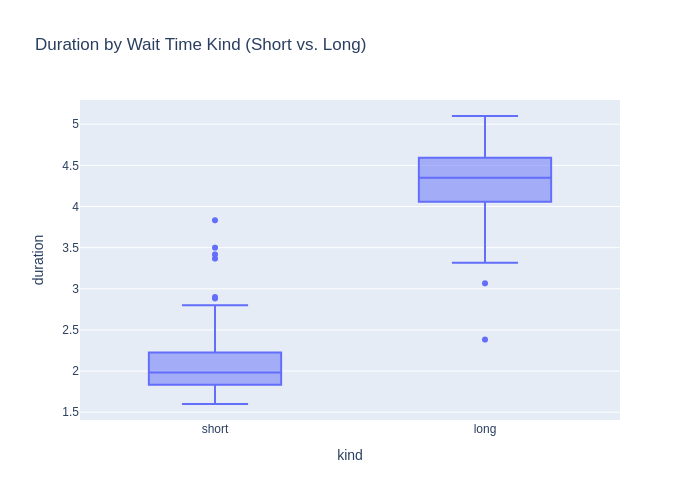

In [9]:
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
from IPython.display import display

# Load the Old Faithful dataset and categorize by short and long wait times
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit the Simple Linear Regression model with the indicator variable
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the model summary table for the "kind" variable
display(indicator_model.summary().tables[1])

# Box plot of duration by kind to visualize group differences
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Wait Time Kind (Short vs. Long)',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

### Q12: Evaluating the Normality Assumption of Error Terms Using Residual Histograms

The **assumption of normally distributed error terms** in Simple Linear Regression can be assessed by examining the distributional shape of the model residuals. A histogram of residuals close to a normal distribution supports this assumption, while deviations (e.g., skewness, heavy tails) suggest that the normality assumption may not hold.

#### Analysis of Residual Histograms for Each Model

1. **Model 1 (All Data Using Slope)**: The histogram for Model 1 appears closer to a normal distribution, as it shows a symmetric shape centered around zero with relatively few outliers. The overlayed normal curve aligns well with the distribution of residuals, making this histogram more consistent with the assumption of normally distributed error terms.

2. **Model 2 (Short Wait Data)**: This histogram deviates from normality, displaying a more irregular and possibly skewed shape. Since the data are limited to short wait times, the variation captured in the residuals may not follow a normal distribution.

3. **Model 3 (Long Wait Data)**: Similar to Model 2, the histogram for long wait times shows signs of skewness or non-uniformity, with deviations from the normal curve. This suggests that restricting the data to long wait times alone may not satisfy the normality assumption for error terms.

4. **Model 4 (Indicator Variable)**: The residuals for the model using the indicator variable `kind` appear highly skewed, as they do not fit the overlayed normal curve. This significant deviation suggests that dividing data into short and long categories fails to satisfy the assumption of normally distributed error terms.

#### Summary
Only **Model 1** appears consistent with the normality assumption, as its residuals closely match the normal distribution. Models 2, 3, and 4 show irregular patterns, suggesting that restricting data by wait times or using a categorical indicator variable introduces non-normality in residuals.


### Q13: Permutation Test and Bootstrap Confidence Interval for Differences in Means Between Short and Long Wait Times

#### (A) Permutation Test by Shuffling Labels
A permutation test evaluates whether the observed difference in means between "short" and "long" wait times could occur by random chance. Here, we **shuffle the labels** ("short" and "long") multiple times and calculate the difference in means for each permutation to create a distribution of the mean differences.

- **Procedure**: 
  1. Shuffle the `kind` labels, assigning each observation a new "short" or "long" label randomly while keeping the data values fixed.
  2. Compute the difference in mean durations between the shuffled groups for each permutation.
  3. Repeat the shuffling process (e.g., 1000 times) to generate a distribution of mean differences.
  4. Compare the observed mean difference to this distribution to estimate the p-value for the null hypothesis of no difference in means.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load dataset and initialize observed statistic
old_faithful = sns.load_dataset('geyser')
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Permutation test
permutation_diffs = []
for _ in range(1000):
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    mean_diff_shuffled = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(mean_diff_shuffled)

# Calculate p-value
permutation_p_value = (np.abs(permutation_diffs) >= np.abs(observed_mean_diff)).mean()

In [11]:
# Bootstrap confidence interval
bootstrapped_mean_diffs = []
for _ in range(1000):
    bootstrapped_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    bootstrapped_mean_diff = bootstrapped_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(bootstrapped_mean_diff)

# 95% confidence interval
bootstrap_ci = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])



### Q14:  Yes
    

### ChatGPT Summary for Old Faithful Geyser Data Analysis

[Link](https://chatgpt.com/)

1. **Theoretical Explanation and Visualization** (Q1-Q3):  
   We explained the theoretical basis of Simple Linear Regression, focusing on the model’s components (slope, intercept, and error terms) and illustrated the difference between theoretical and fitted lines. The visualization showed how sampling variation influences model estimates by overlaying the theoretical line with the fitted regression line.

2. **Assessing R-squared and Correlation** (Q4-Q6):  
   We discussed R-squared as a measure of model fit, representing the proportion of variation in \( Y \) explained by the model. The squared correlation (R-squared) quantifies the strength of the linear relationship between predictor and outcome, aiding in interpreting model accuracy.

3. **Short vs. Long Wait Time Comparison** (Q7-Q11):  
   By evaluating model assumptions (normality, homoscedasticity) through residual histograms, we assessed the compatibility of different models. We fitted separate models for short and long wait times and introduced an indicator variable model to compare average durations between groups, highlighting differences in findings compared to continuous predictor models.

4. **Hypothesis Testing Using Permutation and Bootstrapping** (Q13):  
   To test for differences in mean durations between short and long wait times, we conducted a permutation test by shuffling labels to simulate the null hypothesis and calculate p-values. Additionally, we computed a 95% bootstrap confidence interval by resampling within each group, providing a range for the mean difference that supported non-parametric analysis of group differences.

This session provided insights into statistical techniques for understanding differences in geyser eruption durations based on wait times, comparing traditional regression, indicator variable models, and non-parametric methods like permutation and bootstrapping.
